In [16]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import os
import pickle
%matplotlib inline
from datetime import datetime
from dateutil.parser import parse

In [17]:
with open("all_clean_data.pkl", 'rb') as picklefile: 
    merge_housing = pickle.load(picklefile)
merge_housing.head()

,BedSize,Year,Month,Apartment_rent,Shift_Year,Shift_Month,Zillow_Housing_price,Search_Count_SeattleRent,Search_Count_SeattleHousing,Search_Count_seattleApartment,...,PriceDropsMom,PriceDropsYoy,SoldAboveList,SoldAboveListMom,SoldAboveListYoy,Date,count_news_seattle+shooting,count_news_seattle+murder,count_news_seattle+dead+shooting,target_Apartment_rent
28,Studio,2013,7,1188.0,2013,07,430600.0,40,25,22,...,0.039606,0.037088,0.277174,0.021826,0.032856,2013-07-01,8170,10900,5460,1188.0
29,Studio,2013,8,1199.0,2013,08,435300.0,37,23,24,...,-0.012473,0.044360,0.331746,0.054572,-0.007477,2013-08-01,9740,13900,6380,1199.0
30,Studio,2013,9,1231.0,2013,09,430100.0,42,27,27,...,0.024914,0.017092,0.404790,0.073044,0.041376,2013-09-01,4420,7230,3030,1231.0
31,Studio,2013,10,1180.0,2013,10,424600.0,40,27,26,...,0.004972,0.025687,0.453044,0.048254,0.043381,2013-10-01,10400,14800,6720,1180.0
32,Studio,2013,11,1205.0,2013,11,424900.0,46,27,28,...,0.010006,0.012604,0.439771,-0.013274,-0.013229,2013-11-01,10500,15900,7070,1205.0


In [18]:
merge_housing=merge_housing.dropna()

In [19]:
studio_df = merge_housing.loc[merge_housing['BedSize'] == 'Studio']
oneBed_df = merge_housing.loc[merge_housing['BedSize'] == '1Bedroom']
twoBed_df = merge_housing.loc[merge_housing['BedSize'] == '2Bedroom']

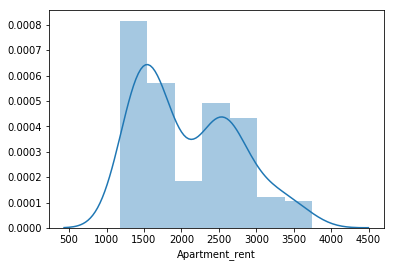

In [20]:
sns.distplot(merge_housing.Apartment_rent)

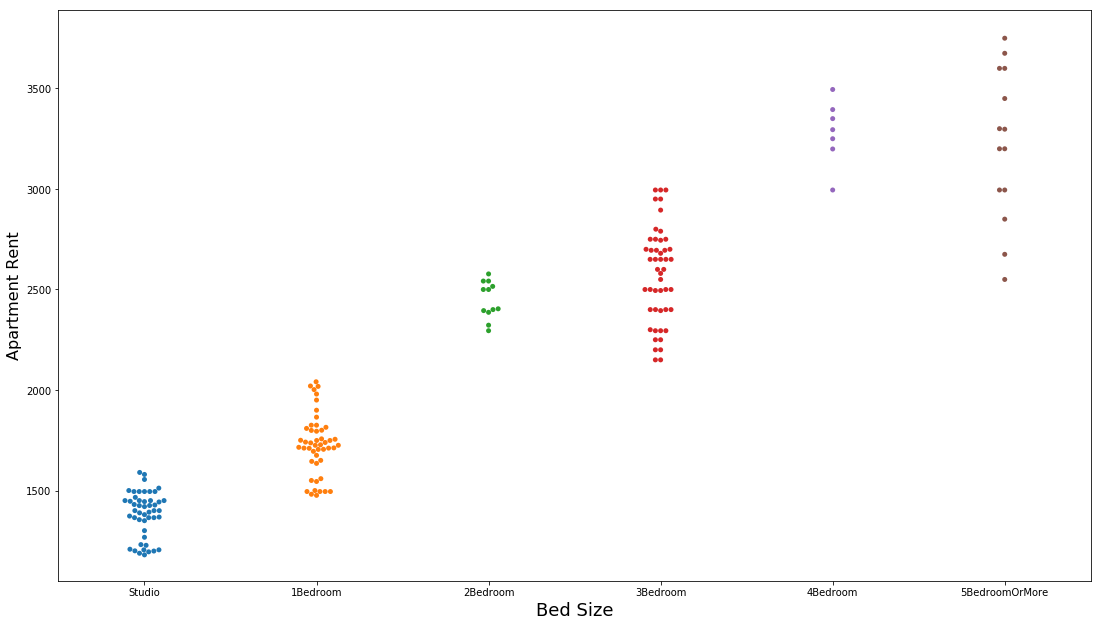

In [21]:
plt.subplots(figsize=(18.5, 10.5))
ax = sns.swarmplot(x=merge_housing['BedSize'], y=merge_housing['Apartment_rent'], data=merge_housing)
ax.set_ylabel('Apartment Rent', fontsize=16);
ax.set_xlabel('Bed Size', fontsize=18)
fig = ax.get_figure()
fig.savefig("swarmplot_Apartment_BedSize.png")

In [22]:
merge_housing.dtypes

BedSize                                     object
Year                                         int64
Month                                        int64
Apartment_rent                             float64
Shift_Year                                  object
Shift_Month                                 object
Zillow_Housing_price                       float64
Search_Count_SeattleRent                     int64
Search_Count_SeattleHousing                  int64
Search_Count_seattleApartment                int64
AvgSaleToList                              float64
AvgSaleToListMom                           float64
AvgSaleToListYoy                           float64
HomesSold                                    int64
HomesSoldMom                               float64
HomesSoldYoy                               float64
Inventory                                    int64
InventoryMom                               float64
InventoryYoy                               float64
MedianDom                      

In [34]:
selectColumns = ['Year','Month','Zillow_Housing_price'
                                     , 'Search_Count_SeattleHousing'
                                     , 'Search_Count_seattleApartment'
                                     , 'HomesSold'
                                     , 'MedianSalePrice'
                                     , 'Inventory'
                                     , 'SoldAboveListYoy'
                                     , 'PriceDropsMom'
                 ,'AvgSaleToList'
                 , 'count_news_seattle+shooting', 'count_news_seattle+murder', 'count_news_seattle+dead+shooting'
                                     , 'target_Apartment_rent'

                ]

In [35]:
selected_col = merge_housing.loc[:, selectColumns]

In [43]:
merge_housing.corr()['target_Apartment_rent'].sort_values()

Inventory                          -0.405257
months_of_supply                   -0.359421
HomesSoldYoy                       -0.216900
MedianDom                          -0.168558
PriceDrops                         -0.162323
InventoryYoy                       -0.144069
NewListings                        -0.124981
Search_Count_SeattleRent           -0.120103
Search_Count_seattleApartment      -0.120058
HomesSoldMom                       -0.094727
PriceDropsMom                      -0.068990
PriceDropsYoy                      -0.059771
Month                              -0.055547
HomesSold                          -0.053971
InventoryMom                       -0.039264
NewListingsYoy                     -0.032809
MedianSalePriceMom                  0.005266
NewListingsMom                      0.005600
MedianListPriceMom                  0.018755
MedianDomMom                        0.025824
MedianDomYoy                        0.032372
MedianPpsfMom                       0.033120
Search_Cou

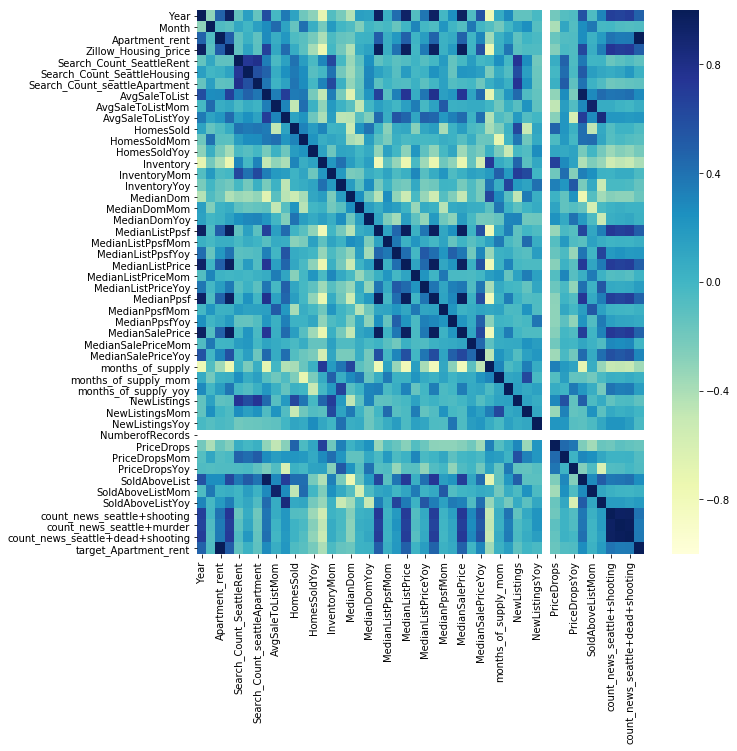

In [40]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

ax = sns.heatmap(merge_housing.corr(),cmap='YlGnBu', vmin=-1)
fig = ax.get_figure()
fig.savefig("heatmap.png")

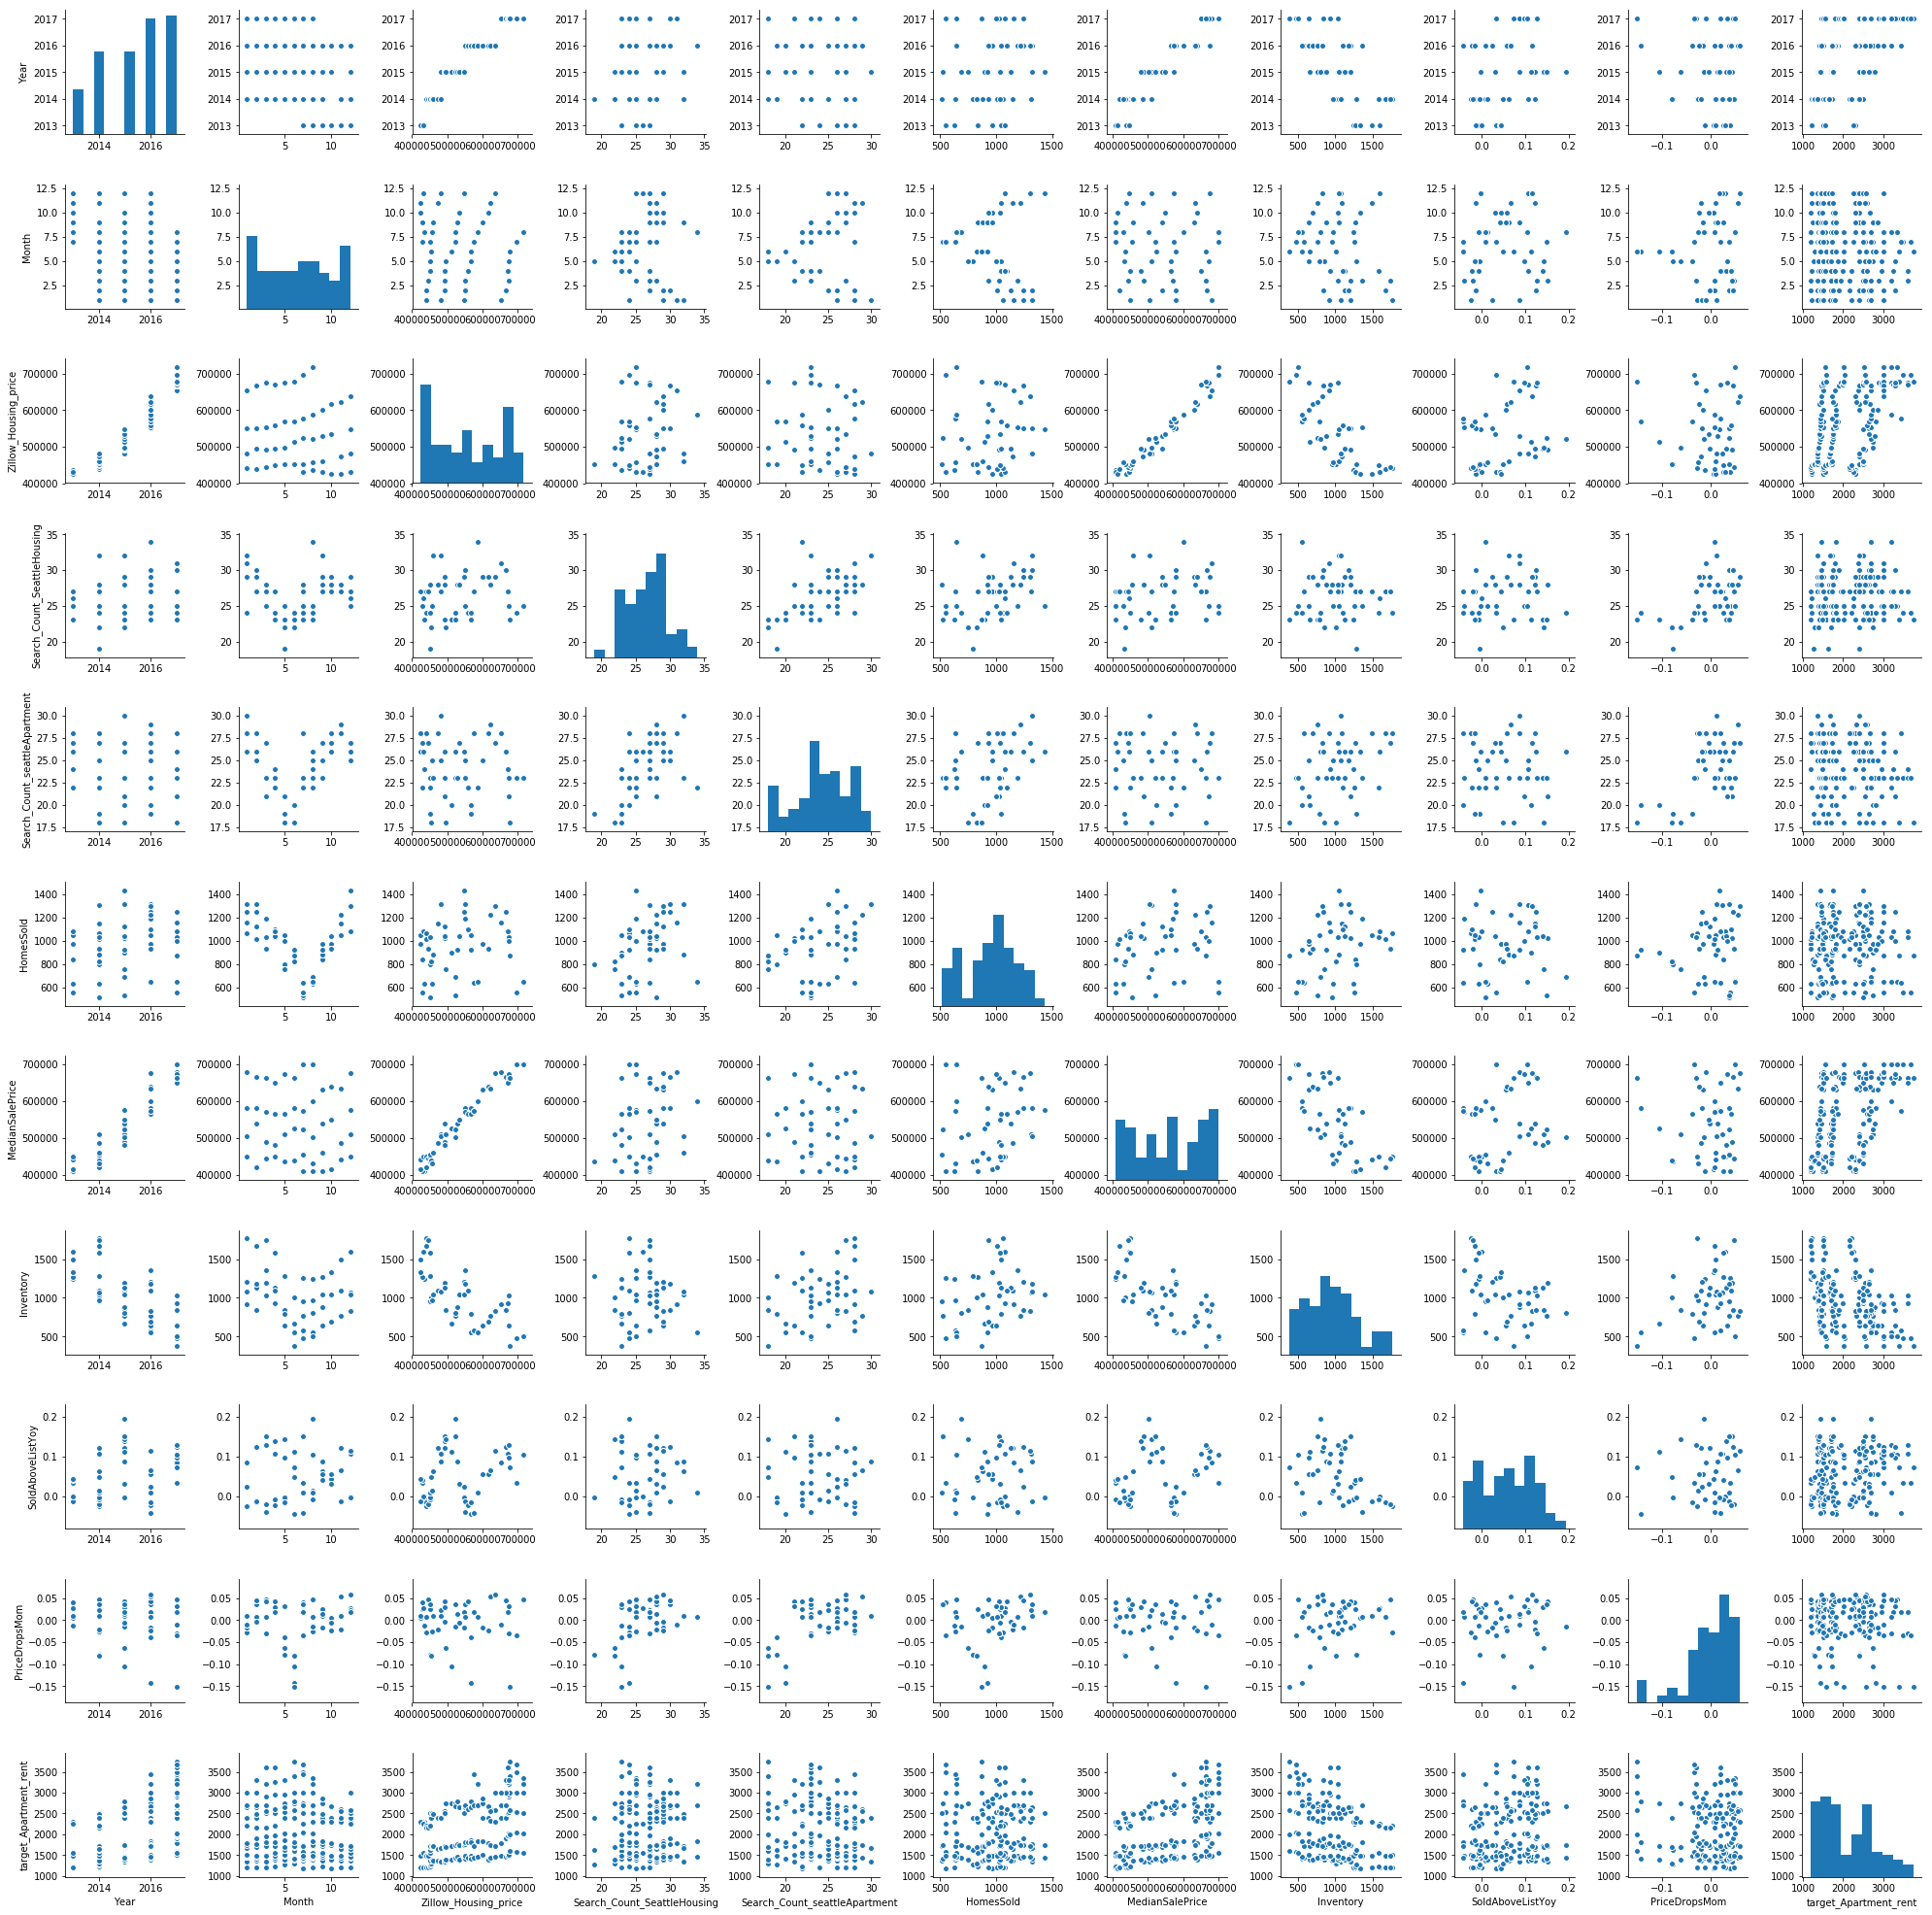

In [13]:
g = sns.pairplot(selected_col)

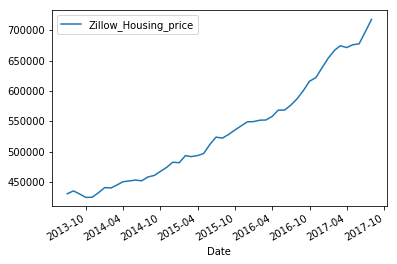

In [14]:
merge_housing.plot.line(x='Date', y='Zillow_Housing_price')

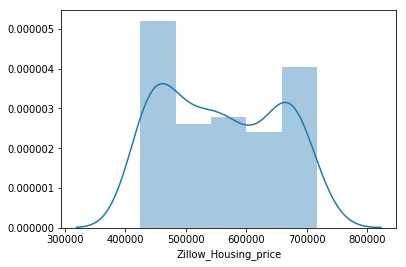

In [15]:
sns.distplot(merge_housing.Zillow_Housing_price.dropna())

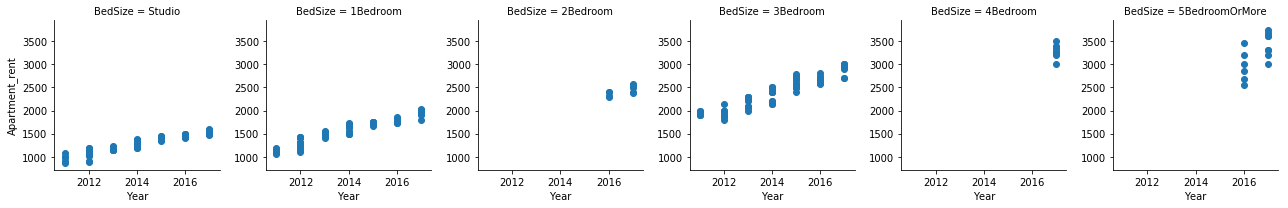

In [41]:
# Let's now look at Distribution of Age and Survived
# Now look at survived data
g = sns.FacetGrid(merge_housing, col='BedSize')
g.map(plt.scatter, 'Year', "Apartment_rent")



In [42]:
merge_housing['Year'].value_counts()

2017    47
2016    46
2015    36
2014    36
2013    36
2012    36
2011    18
Name: Year, dtype: int64

In [43]:
merge_housing['BedSize'].value_counts()

Studio            74
1Bedroom          74
3Bedroom          74
5BedroomOrMore    14
2Bedroom          12
4Bedroom           7
Name: BedSize, dtype: int64

In [44]:
#df_apartment_bedSize = pd.get_dummies(merge_housing['BedSize'])
#zillow_apartment_df_new = pd.concat([merge_housing, df_apartment_bedSize], axis=1)


In [45]:
# Get Average
zillow_apartment_grouped_df = merge_housing
zillow_apartment_grouped_df.groupby(['BedSize', 'Year', 'Month'], as_index=False)['Apartment_rent'].agg('mean')
zillow_apartment_grouped_df.head()

,BedSize,Year,Month,Apartment_rent,Shift_Year,Shift_Month,Zillow_Housing_price,Search_Count_SeattleRent,Search_Count_SeattleHousing,Search_Count_seattleApartment,...,NewListingsYoy,NumberofRecords,PriceDrops,PriceDropsMom,PriceDropsYoy,SoldAboveList,SoldAboveListMom,SoldAboveListYoy,Date,target_Apartment_rent
4,Studio,2011,7,1000.0,2011,07,365300.0,36,25,22,...,-16.2,1.0,0.286394,0.082724,-0.006008,0.162996,-0.008754,0.059369,2011-07-01,1000.0
5,Studio,2011,8,1000.0,2011,08,367900.0,36,24,22,...,-11.2,1.0,0.289133,0.002739,0.019233,0.167315,0.004320,0.038875,2011-08-01,1000.0
6,Studio,2011,9,1075.0,2011,09,381900.0,38,28,22,...,-6.4,1.0,0.282218,-0.006915,-0.040034,0.255848,0.088533,0.130313,2011-09-01,1075.0
7,Studio,2011,10,995.0,2011,10,393600.0,38,29,28,...,-8.1,1.0,0.262083,-0.020135,-0.028809,0.270305,0.014457,0.104366,2011-10-01,995.0
8,Studio,2011,11,865.0,2011,11,400700.0,46,26,25,...,4.8,1.0,0.259186,-0.002897,-0.039458,0.292494,0.022190,0.136814,2011-11-01,865.0


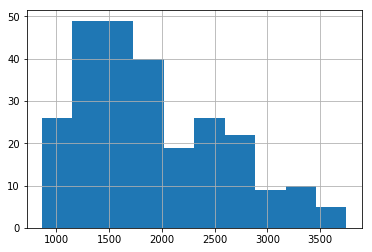

In [46]:
merge_housing['Apartment_rent'].hist()

In [47]:
studio_df['Year'].value_counts()

2016    12
2015    12
2014    12
2013    12
2012    12
2017     8
2011     6
Name: Year, dtype: int64

In [48]:
studio_df.head()

,BedSize,Year,Month,Apartment_rent,Shift_Year,Shift_Month,Zillow_Housing_price,Search_Count_SeattleRent,Search_Count_SeattleHousing,Search_Count_seattleApartment,...,NewListingsYoy,NumberofRecords,PriceDrops,PriceDropsMom,PriceDropsYoy,SoldAboveList,SoldAboveListMom,SoldAboveListYoy,Date,target_Apartment_rent
4,Studio,2011,7,1000.0,2011,07,365300.0,36,25,22,...,-16.2,1.0,0.286394,0.082724,-0.006008,0.162996,-0.008754,0.059369,2011-07-01,1000.0
5,Studio,2011,8,1000.0,2011,08,367900.0,36,24,22,...,-11.2,1.0,0.289133,0.002739,0.019233,0.167315,0.004320,0.038875,2011-08-01,1000.0
6,Studio,2011,9,1075.0,2011,09,381900.0,38,28,22,...,-6.4,1.0,0.282218,-0.006915,-0.040034,0.255848,0.088533,0.130313,2011-09-01,1075.0
7,Studio,2011,10,995.0,2011,10,393600.0,38,29,28,...,-8.1,1.0,0.262083,-0.020135,-0.028809,0.270305,0.014457,0.104366,2011-10-01,995.0
8,Studio,2011,11,865.0,2011,11,400700.0,46,26,25,...,4.8,1.0,0.259186,-0.002897,-0.039458,0.292494,0.022190,0.136814,2011-11-01,865.0


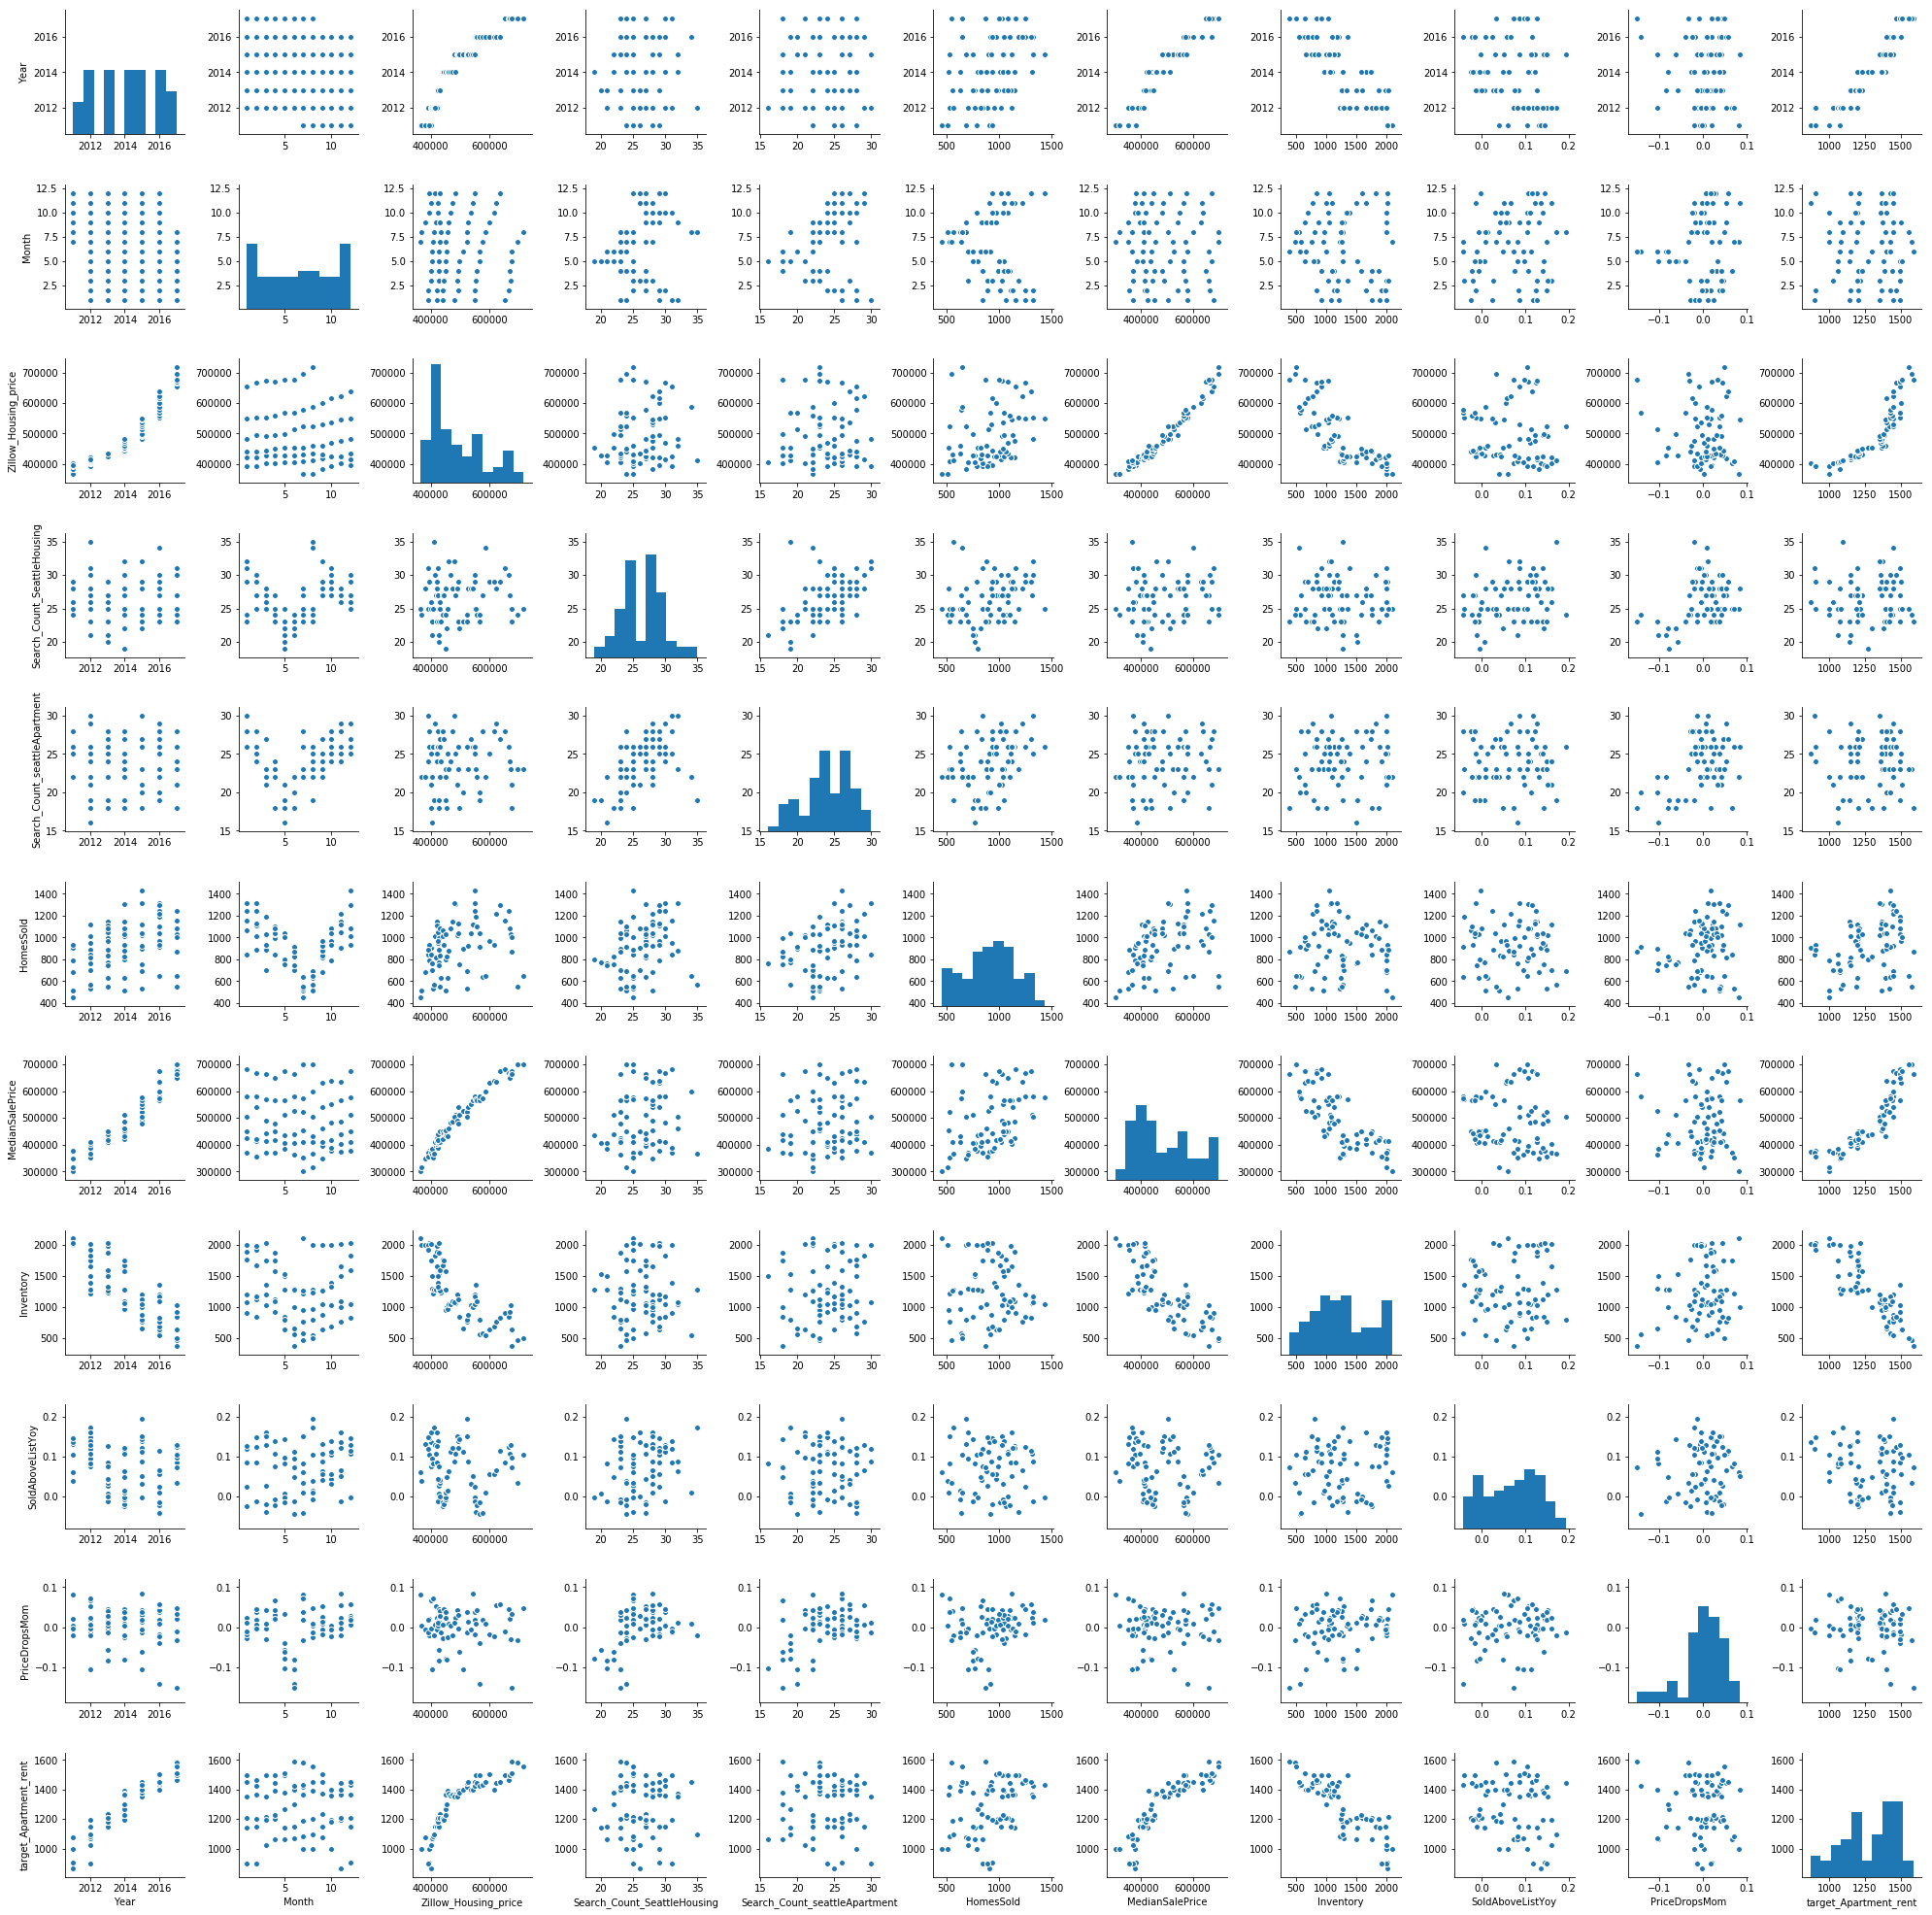

In [49]:
g = sns.pairplot(studio_df.loc[:, selectColumns])

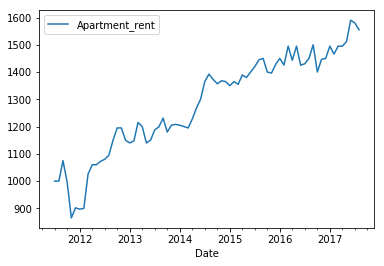

In [50]:
studio_df.plot(x='Date', y='Apartment_rent')

In [21]:
studio_df[studio_df.Apartment_rent < 1200]

,BedSize,Year,Month,Apartment_rent,Shift_Year,Shift_Month,Zillow_Housing_price,Search_Count_SeattleRent,Search_Count_SeattleHousing,Search_Count_seattleApartment,...,NewListingsYoy,NumberofRecords,PriceDrops,PriceDropsMom,PriceDropsYoy,SoldAboveList,SoldAboveListMom,SoldAboveListYoy,Date,target_Apartment_rent
4,Studio,2011,7,1000.0,2011,07,365300.0,36,25,22,...,-16.2,1.0,0.286394,0.082724,-0.006008,0.162996,-0.008754,0.059369,2011-07-01,1000.0
5,Studio,2011,8,1000.0,2011,08,367900.0,36,24,22,...,-11.2,1.0,0.289133,0.002739,0.019233,0.167315,0.004320,0.038875,2011-08-01,1000.0
6,Studio,2011,9,1075.0,2011,09,381900.0,38,28,22,...,-6.4,1.0,0.282218,-0.006915,-0.040034,0.255848,0.088533,0.130313,2011-09-01,1075.0
7,Studio,2011,10,995.0,2011,10,393600.0,38,29,28,...,-8.1,1.0,0.262083,-0.020135,-0.028809,0.270305,0.014457,0.104366,2011-10-01,995.0
8,Studio,2011,11,865.0,2011,11,400700.0,46,26,25,...,4.8,1.0,0.259186,-0.002897,-0.039458,0.292494,0.022190,0.136814,2011-11-01,865.0
9,Studio,2011,12,902.0,2011,12,395100.0,45,29,26,...,-6.8,1.0,0.279230,0.020045,-0.042252,0.303323,0.010828,0.144919,2011-12-01,902.0
10,Studio,2012,1,897.0,2012,01,390600.0,50,31,30,...,2.6,1.0,0.266467,-0.012763,-0.049207,0.296429,-0.006894,0.118817,2012-01-01,897.0
11,Studio,2012,2,900.0,2012,02,392100.0,47,25,24,...,-1.8,1.0,0.285342,0.018875,-0.030448,0.279461,-0.016967,0.148671,2012-02-01,900.0
12,Studio,2012,3,1025.0,2012,03,400800.0,37,26,21,...,13.1,1.0,0.281732,-0.003609,-0.036479,0.311429,0.031967,0.160427,2012-03-01,1025.0
13,Studio,2012,4,1060.0,2012,04,400300.0,27,25,18,...,9.6,1.0,0.348890,0.067158,0.015557,0.260355,-0.051074,0.074194,2012-04-01,1060.0


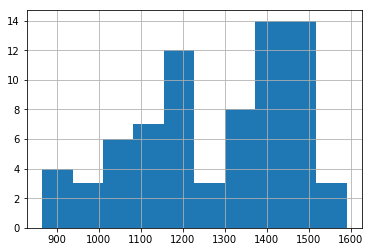

In [22]:
studio_df['Apartment_rent'].hist()

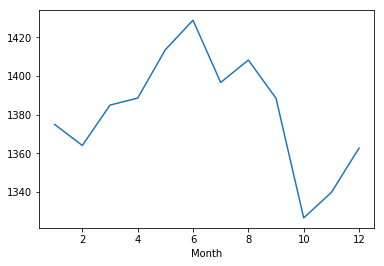

In [48]:
studio_df.groupby(['Month'])['target_Apartment_rent'].mean().plot()

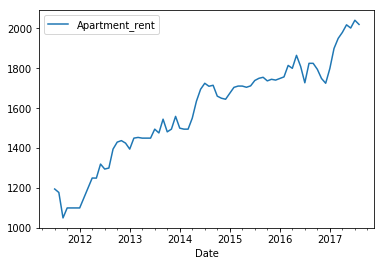

In [23]:
oneBed_df.plot.line(x='Date', y='Apartment_rent')

In [ ]:
oneBed_df['Apartment_rent'].hist()

In [ ]:
oneBed_df['log_price'] = np.log(oneBed_df['Apartment_rent'])
oneBed_df.plot.line(x='Date', y='log_price')

In [ ]:
oneBed_df.head()

In [ ]:
twoBed_df.plot.line(x='Date', y='Apartment_rent')

In [ ]:
twoBed_df['Apartment_rent'].hist()

In [ ]:
# Plot all of the variable-to-variable relations as scatterplots
#pd.scatter_matrix(merge_housing_dropNa.iloc[:, -5:-1], figsize=(12,8), s=10);

In [ ]:
#merge_housing_dropNa.dtypes

In [ ]:
studio_index = studio_df.set_index('Date')
studio_index.head()
y = studio_index.Apartment_rent
y.index.name = 'Date'
y.head()


In [ ]:
ax = y.plot();
ax.set_ylabel('# Rent');

In [ ]:
y.loc['2017-01-01':'2017-12-01'].plot();
